# Proyek Pertama Machine Learning Expert Dicoding: Predictive Analytics - Diabet

- **Nama:** Muchamad Aldi Firmansyah

🩺 Domain Proyek: Deteksi Dini Diabetes Melalui Machine Learning
Diabetes mellitus merupakan salah satu penyakit tidak menular dengan prevalensi yang terus meningkat secara global. Menurut laporan International Diabetes Federation (IDF), lebih dari 537 juta orang hidup dengan diabetes pada tahun 2021, dan jumlah ini diproyeksikan meningkat menjadi 643 juta pada 2030 serta 783 juta pada 2045 [IDF, 2021]. Bahkan pada 2024, jumlahnya diperkirakan mencapai 589 juta kasus dan terus bertambah, dengan mayoritas penderita tinggal di negara berpenghasilan rendah dan menengah seperti Indonesia [IDF, 2024].

Di Indonesia sendiri, data dari Kementerian Kesehatan RI menunjukkan bahwa pada tahun 2021 terdapat sekitar 19,5 juta penderita diabetes, dan diperkirakan meningkat menjadi 28,6 juta pada tahun 2045 [Kemenkes RI, 2024]. Diabetes tidak hanya berdampak pada kualitas hidup individu, tetapi juga menyebabkan beban besar pada sistem pelayanan kesehatan karena menjadi akar dari berbagai komplikasi serius seperti penyakit jantung, gagal ginjal, dan stroke.

Mengapa masalah ini penting untuk diselesaikan?
Karena sebagian besar penderita tidak menyadari kondisinya hingga mencapai tahap kronis, maka pendekatan deteksi dini sangat krusial. Sayangnya, proses diagnosa konvensional memerlukan pemeriksaan laboratorium dan konsultasi dokter, yang bisa jadi tidak terjangkau atau memakan waktu lama. Oleh karena itu, pendekatan prediktif berbasis machine learning (ML) dapat menjadi solusi alternatif yang cepat, efisien, dan mendukung pengambilan keputusan awal.

Proyek ini bertujuan membangun sistem klasifikasi berbasis ML untuk memprediksi status diabetes seseorang menggunakan data klinis dan demografis. Dengan model ini, sistem dapat digunakan dalam skrining awal untuk mendukung intervensi dini.

Referensi:

International Diabetes Federation. IDF Diabetes Atlas 2021 & 2024. https://diabetesatlas.org

Kementerian Kesehatan RI. Saatnya Mengatur Si Manis, 2024. http://sehatnegeriku.kemkes.go.id

🎯 Business Understanding
🔹 Problem Statements
Bagaimana menyiapkan data klinis agar layak digunakan dalam pemodelan machine learning untuk prediksi diabetes?

Algoritma mana yang paling efektif dan akurat untuk memprediksi status diabetes berdasarkan data klinis dan demografis pasien?

🔹 Goals
Menghasilkan pipeline data preparation yang efektif (pembersihan, encoding, scaling, split).

Membangun model prediksi diabetes yang mampu menghasilkan tingkat error rendah dan akurasi tinggi.

🔹 Solution Statements
Untuk mencapai goals di atas, berikut solusi yang dirancang:

Model Baseline: K-Nearest Neighbor (KNN) sebagai model dasar pembanding.

Model Eksperimen:

Random Forest: model berbasis ensemble bagging untuk menangani non-linearitas data.

AdaBoost: model boosting untuk meningkatkan performa weak learner.

Evaluasi: dilakukan dengan metrik Mean Squared Error (MSE) untuk regresi nilai kelas 0/1 dan grafik komparatif performa model.

Tuning Parameter: dilakukan eksplorasi nilai n_estimators, max_depth, dan learning_rate untuk Random Forest dan AdaBoost.

📊 Data Understanding
📁 Dataset
Dataset digunakan dari sumber terpercaya, yaitu:

Kaggle - Diabetes Clinical Dataset (100K Rows)
https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows

Dataset ini terdiri dari 100.000 baris data pasien dari berbagai ras dan wilayah, dan memiliki 12 kolom fitur yang mencakup data klinis dan demografis.

🔎 Deskripsi Fitur
Fitur	Deskripsi
year	Tahun pencatatan data
gender	Jenis kelamin pasien (Male, Female, Other)
age	Usia pasien dalam tahun
location	Wilayah tempat pasien berada
hypertension	Status hipertensi (0: tidak, 1: ya)
heart_disease	Riwayat penyakit jantung (0: tidak, 1: ya)
smoking_history	Riwayat merokok (never, current, former, dll.)
bmi	Indeks massa tubuh
hbA1c_level	Kadar hemoglobin A1c (%), indikator kontrol gula darah jangka panjang
blood_glucose_level	Kadar glukosa darah saat ini (mg/dL)
diabetes	Status diabetes pasien (0: tidak, 1: ya)
race	Kategori ras (Asian, AfricanAmerican, Caucasian, Hispanic, Other)

📈 Visualisasi & EDA
Boxplot & Histogram: digunakan untuk memahami distribusi dan deteksi outlier.

Heatmap Korelasi: mengukur hubungan antar fitur numerik.

Univariate Analysis: analisis proporsi fitur kategorikal (gender, smoking_history, race).

Outlier Handling: menggunakan metode IQR untuk membersihkan nilai ekstrem.

Multivariate Analysis: dilakukan dengan pairplot (Seaborn) dan pemeriksaan multikolinearitas antar fitur numerik.

# Dataset
* [Diabetes Clinical Dataset(100k rows)](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows)

# Reference
* [Machine Learning Expert Modul](https://www.dicoding.com/academies/319/tutorials/17013)
* [Electric Consumption](https://github.com/aNdr3W03/Electric-Predictive-Analytics)

# **1. Library Import**

*Library* [`os`](https://docs.python.org/3/library/os.html) untuk memproses *function* dari *operating system*. `os.environ` untuk membaca *username* dan *key* [Kaggle](https://kaggle.com).

*Library* [`pandas`](https://pandas.pydata.org) untuk melakukan pemrosesan, analisis dan manipulasi data.

*Library* [`tensorflow`](https://www.tensorflow.org) untuk melakukan pelatihan *machine learning* dan *neural networks*.

*Library* [`sklearn`](https://scikit-learn.org) untuk melakukan pemrosesan *machine learning* dan *data analysis*.

*Library* [`seaborn`](https://seaborn.pydata.org) untuk membuat visualisasi data yang berbasis `matplotlib`.

*Library* [`matplotlib`](https://matplotlib.org/) untuk melakukan visualisasi menggunakan *plotting*.

In [1]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

# **2. Data Loading**

## 2.1 Environment and Kaggle Credential

**Mengatur *environment*** [Colab](https://colab.research.google.com) dengan variabel `KAGGLE_USERNAME` dan variabel `KAGGLE_KEY` untuk menghubungkan platform [Kaggle](https://kaggle.com/) menggunakan [Kaggle's Beta API](https://www.kaggle.com/docs/api) Token.

In [2]:
# Username dan key Kaggle API
os.environ['KAGGLE_USERNAME'] = 'aldidbs020303'
os.environ['KAGGLE_KEY']      = 'd87f99653d27fe1de0b56d2f11185153'

## 2.2 Dataset Download

**Mengunduh *dataset*** dari Kaggle dengan nama *file* *dataset*, yaitu `diabetes_dataset_with_notes.csv`. *Dataset* yang digunakan dalam proyek ini adalah *dataset* [Diabetes Clinical Dataset](https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows) yang berupa berkas `.csv` ([Comma-separated Values](https://en.wikipedia.org/wiki/Comma-separated_values)).

In [3]:
# Download dataset dari Kaggle
!kaggle datasets download -d ziya07/diabetes-clinical-dataset100k-rows -f diabetes_dataset_with_notes.csv

Dataset URL: https://www.kaggle.com/datasets/ziya07/diabetes-clinical-dataset100k-rows
License(s): CC0-1.0
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.11GB/s]


**Menampilkan isi *dataset*** menggunakan *library* [Pandas](https://pandas.pydata.org/) dengan mengubah format CSV menjadi *dataframe*.

In [4]:
diabet = pd.read_csv('diabetes_dataset_with_notes.csv')
diabet.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,clinical_notes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,"Overweight, advised dietary and exercise modif..."
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,Healthy BMI range.
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,"Young patient, generally lower risk but needs ..."
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,"Overweight, advised dietary and exercise modif..."
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,"Healthy BMI range. High HbA1c level, indicativ..."


## 2.3 Dataset Preparation

Menggabungkan kolom `race:AfricanAmerican`, `race:Asian`, `race:Caucasian`, `race:Hispanic`, `race:Other` menjadi satu kolom baru `race`

In [5]:
race_columns = ['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']
diabet['race'] = diabet[race_columns].idxmax(axis=1)

diabet['race'] = diabet['race'].str.replace('race:', '')

diabet.drop(columns=race_columns, inplace=True)

Menghapus kolom yang tidak akan digunakan yaitu, kolom `clinical_notes`.

In [6]:
diabet.drop('clinical_notes', inplace=True, axis=1)

# **3. Data Understanding**

## 3.1 Menampilkan Data pada Dataframe `diabet`

In [7]:
diabet.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,0,0,never,23.75,6.5,90,0,AfricanAmerican


## 3.2 *Exploratory Data Analysis* (EDA)

*Explanatory Data Analysis* (EDA) adalah suatu proses investigasi awal pada data untuk melakukan analisis karakteristik, menemukan pola, anomali, dan memeriksa asumsi pada data dengan menggunakan bantuan statistik dan representasi grafis atau visualisasi.

### 3.2.1 Deskripsi Variabel

Melakukan pengecekan informasi dari *dataframe* `diabet` seperti, jumlah kolom, nama kolom, jumlah data setiap kolom, dan tipe data pada kolom.

In [8]:
diabet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 100000 non-null  int64  
 1   gender               100000 non-null  object 
 2   age                  100000 non-null  float64
 3   location             100000 non-null  object 
 4   hypertension         100000 non-null  int64  
 5   heart_disease        100000 non-null  int64  
 6   smoking_history      100000 non-null  object 
 7   bmi                  100000 non-null  float64
 8   hbA1c_level          100000 non-null  float64
 9   blood_glucose_level  100000 non-null  int64  
 10  diabetes             100000 non-null  int64  
 11  race                 100000 non-null  object 
dtypes: float64(3), int64(5), object(4)
memory usage: 9.2+ MB


Terdapat tiga (3) atribut dengan tipe data `float64` dan lima (5) atribut dengan tipe data `int64`. Selain itu, terdapat empat (4) atribut dengan tipe data `object` yang merepresentasikan data kategorikal seperti `gender`, `location`, `smooking_history`, dan `race`.


### 3.2.2 Deskripsi Statistik

In [9]:
diabet.describe()

,year,age,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


Melihat deskripsi statistik dari *dataframe* `diabet` yaitu,
1.   `count` : Jumlah data
2.   `mean` : Rata-rata
3.   `std` : Standar deviasi/simpangan baku
4.   `min` : Nilai minimum
5.   `25%` : Kuartil bawah/Q1
6.   `50%` : Kuartil tengah/Q2/median
7.   `75%` : Kuartil atas/Q3
8.   `max` : Nilai maksimum

### 3.2.3 Menangani *Missing Value*

Melakukan pengecekan apakah pada *dataframe* `diabet` terdapat nilai yang *null*/kosong.  

In [10]:
diabet.isnull().sum()

,0
year,0
gender,0
age,0
location,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
hbA1c_level,0
blood_glucose_level,0


Pada *dataframe* `diabet` ternyata tidak ditemukan adanya nilai *null*/kosong di setiap atribut/kolom.  

### 3.2.4 Menangani *Outliers*

Memisahkan data pasien dengan label diabetes dan non diabetes

In [11]:
df_diabetes = diabet[diabet['diabetes'] == 1]
df_ndiabetes = diabet[diabet['diabetes'] == 0]

In [12]:
diabet.diabetes.value_counts()

,count
diabetes,
0,91500
1,8500


Melakukan pengecekan pada *dataframe* `diabet` label `diabet` dan label `non diabet` terdapat data *outliers* atau sampel data yang nilainya berada sangat jauh dari cakupan umum data utama yang dapat merusak hasil analisis data. Pengecekan dilakukan dengan cara visualisasi data menggunakan [`boxplot`](https://seaborn.pydata.org/generated/seaborn.boxplot.html) dengan bantuan *library* [`seaborn`](https://seaborn.pydata.org/).:

<Axes: xlabel='diabetes'>

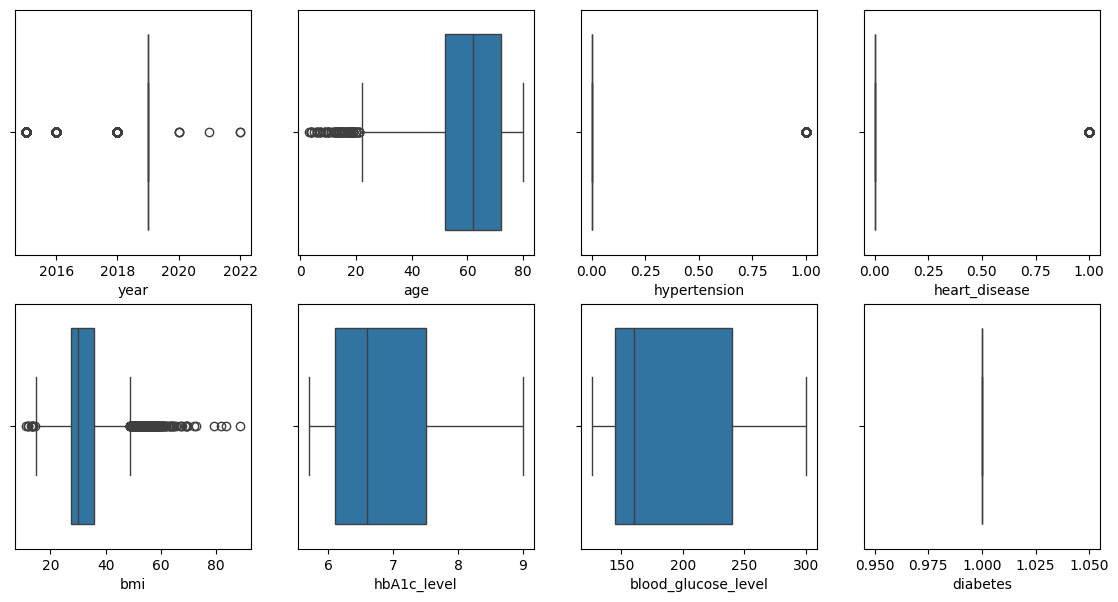

In [13]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
sns.boxplot(ax=axes[0, 0], x=df_diabetes.year)
sns.boxplot(ax=axes[0, 1], x=df_diabetes.age)
sns.boxplot(ax=axes[0, 2], x=df_diabetes.hypertension)
sns.boxplot(ax=axes[0, 3], x=df_diabetes.heart_disease)

sns.boxplot(ax=axes[1, 0], x=df_diabetes.bmi)
sns.boxplot(ax=axes[1, 1], x=df_diabetes.hbA1c_level)
sns.boxplot(ax=axes[1, 2], x=df_diabetes.blood_glucose_level)
sns.boxplot(ax=axes[1, 3], x=df_diabetes.diabetes)

<Axes: xlabel='diabetes'>

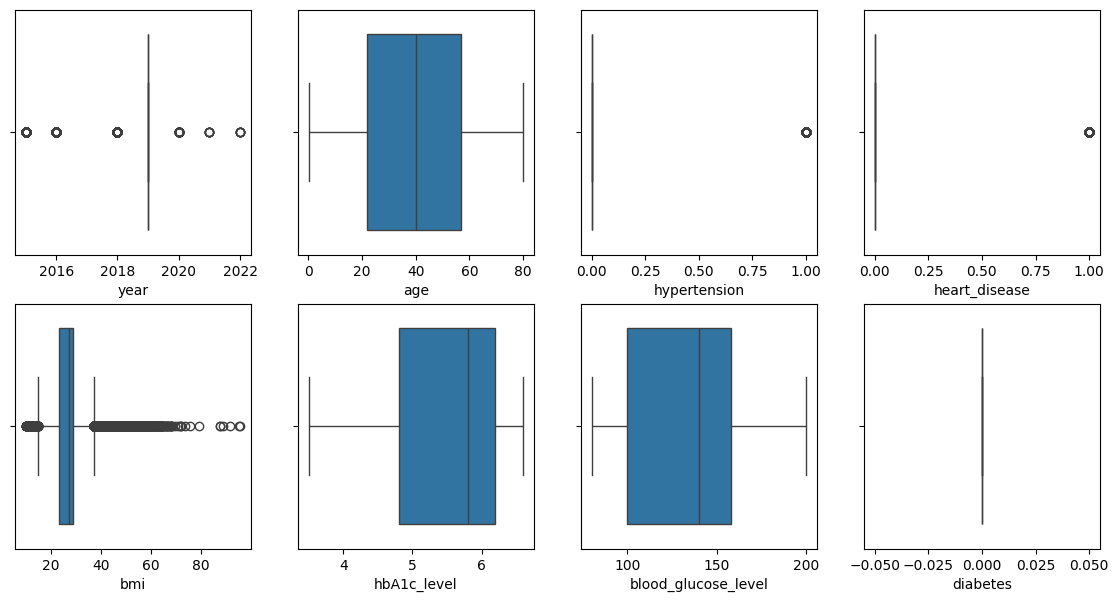

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
sns.boxplot(ax=axes[0, 0], x=df_ndiabetes.year)
sns.boxplot(ax=axes[0, 1], x=df_ndiabetes.age)
sns.boxplot(ax=axes[0, 2], x=df_ndiabetes.hypertension)
sns.boxplot(ax=axes[0, 3], x=df_ndiabetes.heart_disease)

sns.boxplot(ax=axes[1, 0], x=df_ndiabetes.bmi)
sns.boxplot(ax=axes[1, 1], x=df_ndiabetes.hbA1c_level)
sns.boxplot(ax=axes[1, 2], x=df_ndiabetes.blood_glucose_level)
sns.boxplot(ax=axes[1, 3], x=df_ndiabetes.diabetes)

Dapat dilihat pada diagram boxplot (diagram kotak garis) di atas, terdapat beberapa fitur numerik yang memiliki *outliers* seperti, `Year`, `Age`, `Hypertension`, `heart_disease` dan `bmi`.

Untuk mengatasi *outliers*, dilakukan pendekatan menggunakan metode IQR (*Inter Quartile Range*).  

$IQR=Q3-Q1$  

Kemudian membuat batas bawah dan batas atas untuk mencakupi *outliers*.  

$batasBawah=Q1-1.5*IQR$  
$batasAtas=Q3-1.5*IQR$  

In [15]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
# Define numeric_cols to include all numerical features in your dataset
numeric_cols = ['year', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
Q1 = df_diabetes[numeric_cols].quantile(0.25)
Q3 = df_diabetes[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df_diabetes[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df_diabetes[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df_diabetes = df_diabetes[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df_diabetes.shape

(4197, 12)

In [16]:
# Hitung Q1, Q3, dan IQR hanya untuk kolom numerikal
# Define numeric_cols to include all numerical features in your dataset
numeric_cols = ['year', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
Q1 = df_ndiabetes[numeric_cols].quantile(0.25)
Q3 = df_ndiabetes[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Buat filter untuk menghapus baris yang mengandung outlier di kolom numerikal
filter_outliers = ~((df_ndiabetes[numeric_cols] < (Q1 - 1.5 * IQR)) |
                    (df_ndiabetes[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)

# Terapkan filter ke dataset asli (termasuk kolom non-numerikal)
df_ndiabetes = df_ndiabetes[filter_outliers]
# Cek ukuran dataset setelah outlier dihapus
df_ndiabetes.shape

(62314, 12)

Sehingga diperoleh data yang telah dibersihkan sebanyak 4197 untuk diabetes sampel dan 62314 untuk non diabetes sampel.

Melakukan pengecekan kembali terhadap *outliers* dengan menggunakan visualisasi boxplot.

<Axes: xlabel='diabetes'>

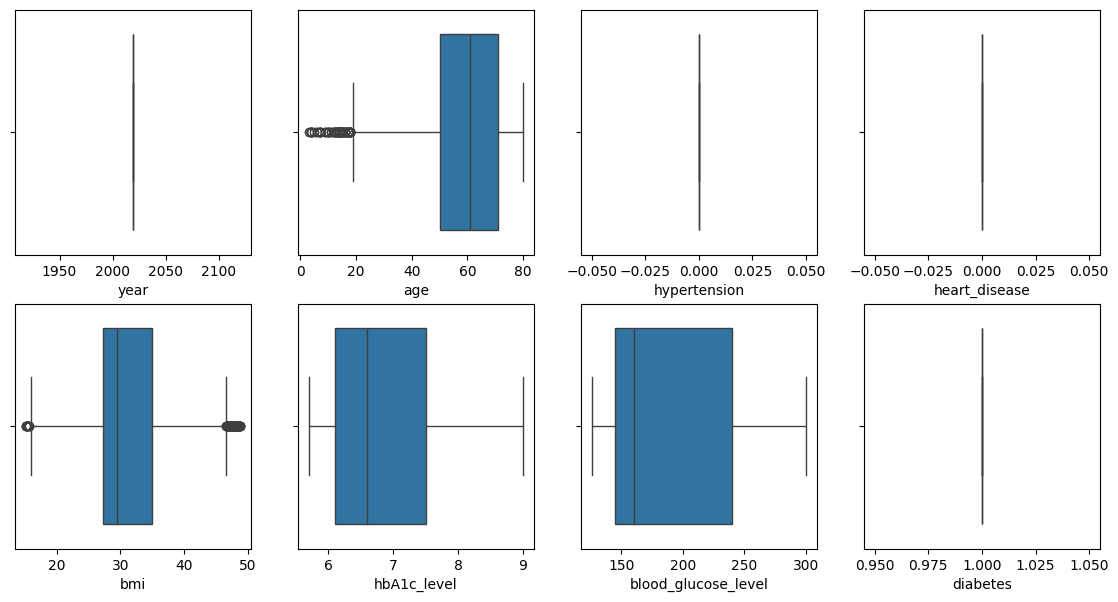

In [17]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
sns.boxplot(ax=axes[0, 0], x=df_diabetes.year)
sns.boxplot(ax=axes[0, 1], x=df_diabetes.age)
sns.boxplot(ax=axes[0, 2], x=df_diabetes.hypertension)
sns.boxplot(ax=axes[0, 3], x=df_diabetes.heart_disease)

sns.boxplot(ax=axes[1, 0], x=df_diabetes.bmi)
sns.boxplot(ax=axes[1, 1], x=df_diabetes.hbA1c_level)
sns.boxplot(ax=axes[1, 2], x=df_diabetes.blood_glucose_level)
sns.boxplot(ax=axes[1, 3], x=df_diabetes.diabetes)

<Axes: xlabel='diabetes'>

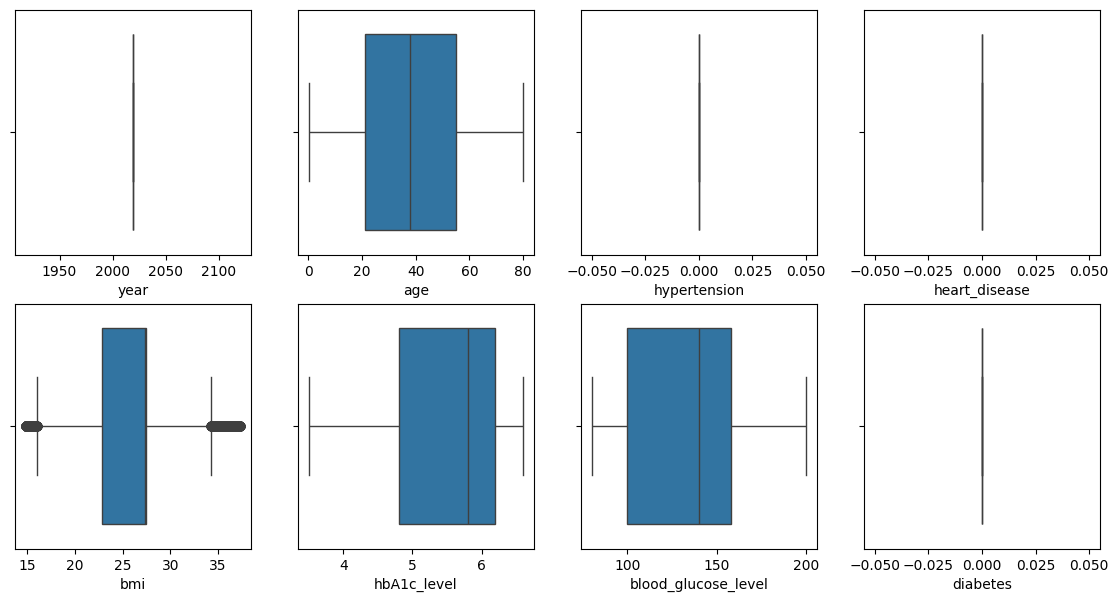

In [18]:
fig, axes = plt.subplots(2, 4, figsize=(14, 7))
sns.boxplot(ax=axes[0, 0], x=df_ndiabetes.year)
sns.boxplot(ax=axes[0, 1], x=df_ndiabetes.age)
sns.boxplot(ax=axes[0, 2], x=df_ndiabetes.hypertension)
sns.boxplot(ax=axes[0, 3], x=df_ndiabetes.heart_disease)

sns.boxplot(ax=axes[1, 0], x=df_ndiabetes.bmi)
sns.boxplot(ax=axes[1, 1], x=df_ndiabetes.hbA1c_level)
sns.boxplot(ax=axes[1, 2], x=df_ndiabetes.blood_glucose_level)
sns.boxplot(ax=axes[1, 3], x=df_ndiabetes.diabetes)

Setelah dilakukan pembersihan *outliers* menggunakan metode IQR (*Inter Quartile Range*), dapat dilihat bahwa *outliers* telah berkurang pada boxplot di atas. Meskipun *outliers* masih ada pada fitur `age` dan`bmi`, tetapi masih dalam batas aman.

Menggabungkan data diabetes dan non diabetes

In [19]:
df_diabet = pd.concat([df_diabetes, df_ndiabetes])

### 3.2.5 Univariate Analysis

Melakukan proses analisis data *univariate* pada fitur-fitur numerik.  

In [20]:
categorical_features = ['gender', 'location', 'smoking_history', 'race']

        jumlah sampel  persentase
gender                           
Female          39048        58.7
Male            27447        41.3
Other              16         0.0


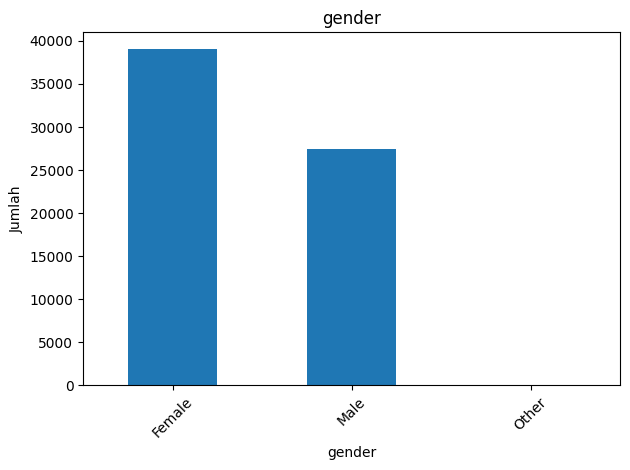

In [21]:
feature = categorical_features[0]

count = df_diabet[feature].value_counts()
percent = 100 * df_diabet[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

count.plot(kind='bar', title=feature)
plt.ylabel('Jumlah')
plt.xlabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mayoritas pasien berjenis kelamin perempuan (58.7%), diikuti oleh laki-laki (41.3%), dan hanya 0.0% atau 16 orang yang dikategorikan sebagai Other

                      jumlah sampel  persentase
location                                       
Nebraska                       1401         2.1
New Jersey                     1399         2.1
North Dakota                   1399         2.1
Pennsylvania                   1398         2.1
Maine                          1398         2.1
Illinois                       1397         2.1
District of Columbia           1389         2.1
New Hampshire                  1389         2.1
Michigan                       1388         2.1
Massachusetts                  1386         2.1
Montana                        1383         2.1
Arkansas                       1383         2.1
North Carolina                 1381         2.1
Mississippi                    1381         2.1
Alaska                         1381         2.1
Missouri                       1381         2.1
New Mexico                     1380         2.1
Hawaii                         1379         2.1
Kentucky                       1379     

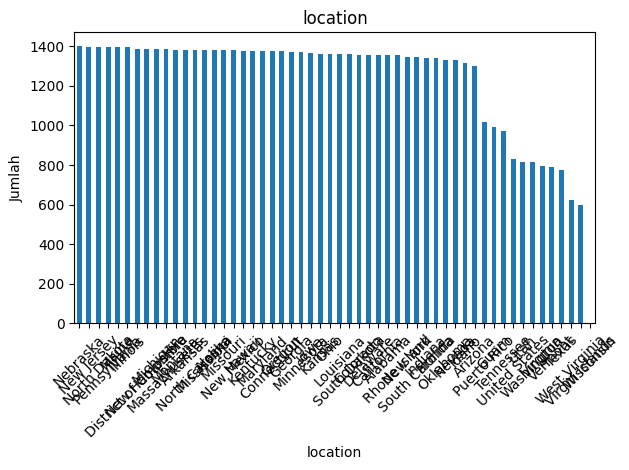

In [22]:
feature = categorical_features[1]

count = df_diabet[feature].value_counts()
percent = 100 * df_diabet[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

count.plot(kind='bar', title=feature)
plt.ylabel('Jumlah')
plt.xlabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Distribusi pasien tersebar cukup merata di seluruh negara bagian AS. Lokasi dengan jumlah pasien tertinggi antara lain Nebraska, New Jersey, dan North Dakota, masing-masing menyumbang sekitar 2.1% dari total data. Sementara itu, lokasi dengan jumlah pasien paling sedikit adalah Wisconsin (hanya 2 sampel atau 0.0%) dan Virgin Islands (0.9%). Hal ini menunjukkan bahwa sebagian besar data berasal dari wilayah yang beragam, namun terdapat perbedaan jumlah sampel yang signifikan antar lokasi.

                 jumlah sampel  persentase
smoking_history                           
No Info                  25410        38.2
never                    22922        34.5
current                   6078         9.1
former                    5337         8.0
not current               4283         6.4
ever                      2481         3.7


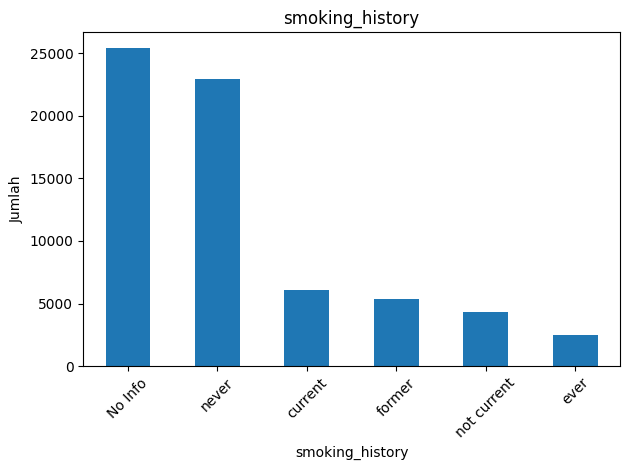

In [23]:
feature = categorical_features[2]

count = df_diabet[feature].value_counts()
percent = 100 * df_diabet[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

count.plot(kind='bar', title=feature)
plt.ylabel('Jumlah')
plt.xlabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Mayoritas data tidak memiliki informasi riwayat merokok (No Info) sebanyak 38.2%, diikuti oleh pasien yang tidak pernah merokok (never) sebesar 34.5%. Sementara itu, kategori lainnya seperti current (masih merokok), former (mantan perokok), not current, dan ever (pernah merokok) memiliki proporsi yang jauh lebih kecil, masing-masing kurang dari 10%. Hal ini menunjukkan bahwa lebih dari setengah data berasal dari pasien yang tidak pernah merokok atau tidak memiliki informasi lengkap terkait kebiasaan merokok.

                 jumlah sampel  persentase
race                                      
AfricanAmerican          13391        20.1
Caucasian                13359        20.1
Other                    13294        20.0
Hispanic                 13282        20.0
Asian                    13185        19.8


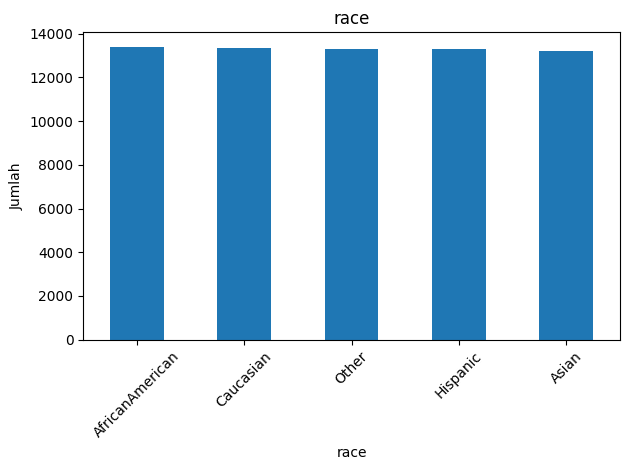

In [24]:
feature = categorical_features[3]

count = df_diabet[feature].value_counts()
percent = 100 * df_diabet[feature].value_counts(normalize=True)

df = pd.DataFrame({'jumlah sampel': count, 'persentase': percent.round(1)})
print(df)

count.plot(kind='bar', title=feature)
plt.ylabel('Jumlah')
plt.xlabel(feature)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Setiap kategori ras seperti AfricanAmerican, Caucasian, Hispanic, Asian, dan Other memiliki jumlah sampel yang hampir sama, dengan masing-masing berkisar 19.8% hingga 20.1%. Hal ini menunjukkan bahwa data telah dikonstruksi secara proporsional antar kelompok ras, sehingga tidak terjadi ketimpangan distribusi yang dapat memengaruhi performa model secara bias terhadap kelompok tertentu.

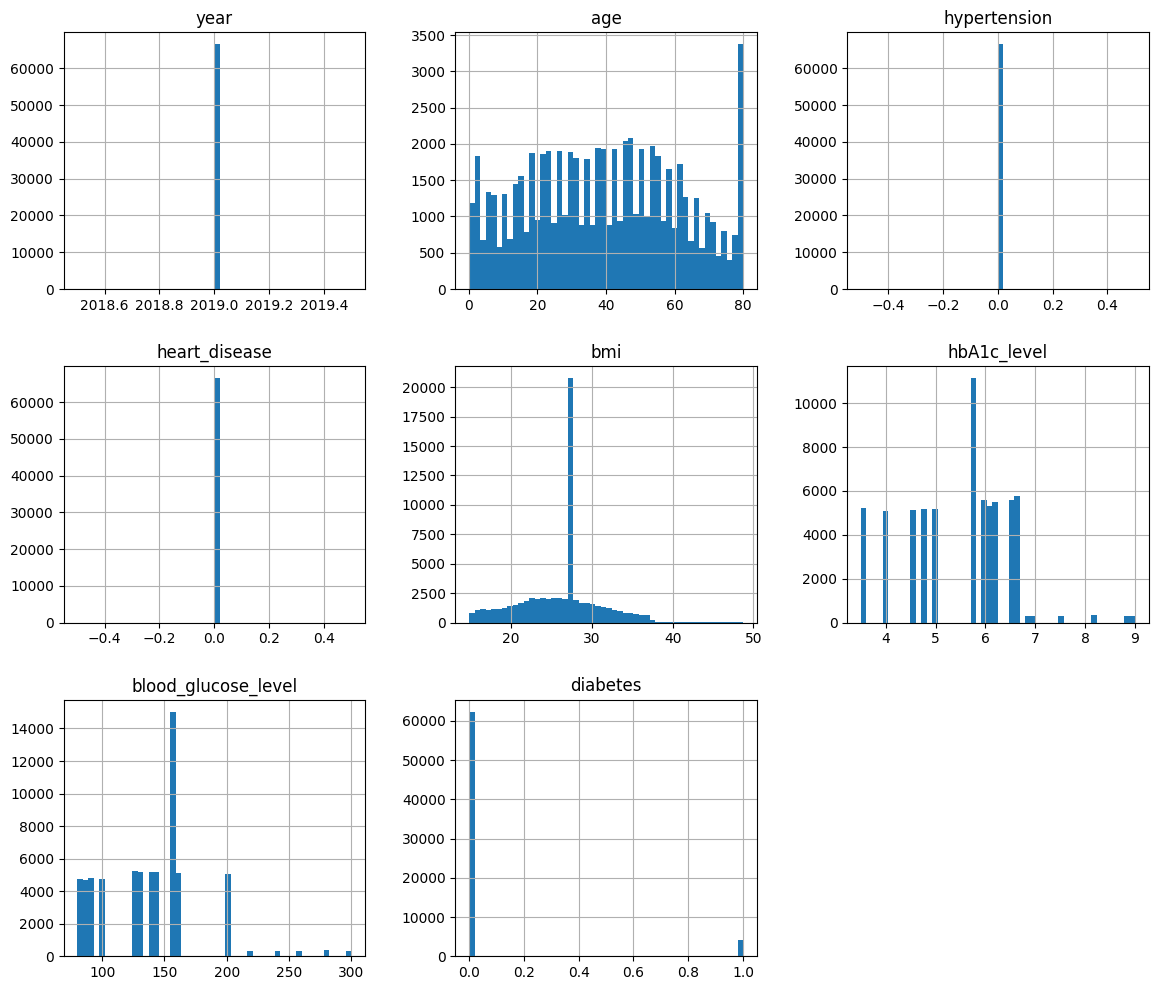

In [25]:
df_diabet.hist(bins=50, figsize=(14, 12))
plt.show()

Dari data histogram di atas diperoleh informasi, yaitu:
1. `year` menunjukkan seluruh data diambil mayoritas pada tahun 2019.
2. `age` memiliki distribusi yang relatif merata dari usia muda hingga tua, tetapi terdapat lonjakan signifikan pada usia sekitar 80 tahun, menandakan banyaknya pasien berusia lanjut.
3. `hypertension` didominasi oleh nilai 0, yang berarti sebagian besar pasien tidak memiliki riwayat hipertensi.
4. `heart_disease` juga sangat didominasi oleh nilai 0, menunjukkan bahwa sebagian besar pasien tidak memiliki riwayat penyakit jantung.
5. `bmi` memiliki distribusi yang mendekati normal, namun terdapat lonjakan tinggi di satu nilai (sekitar 28–30).
6. `hbA1c_level` memiliki persebaran data yang beragam, tetapi paling sering berada pada level 6, yang merupakan batas prediabetes.
7. `blood_glucose_level` menunjukkan beberapa lonjakan pada nilai tertentu (sekitar 100–150), menunjukkan data tidak tersebar merata dan cenderung dikelompokkan.
8. `diabetes` sangat tidak seimbang, dimana mayoritas data menunjukkan pasien tidak menderita diabetes (nilai 0), dan hanya sebagian kecil yang menderita diabetes (nilai 1).

### 3.2.6 Multivariate Analysis

Melakukan visualisasi distribusi data pada fitur-fitur numerik dari *dataframe* `diabet`. Visualisasi dilakukan dengan bantuan *library* `seaborn` `pairplot` menggunakan parameter `diag_kind`, yaitu `kde`, untuk melihat perkiraan distribusi probabilitas antar fitur numerik.

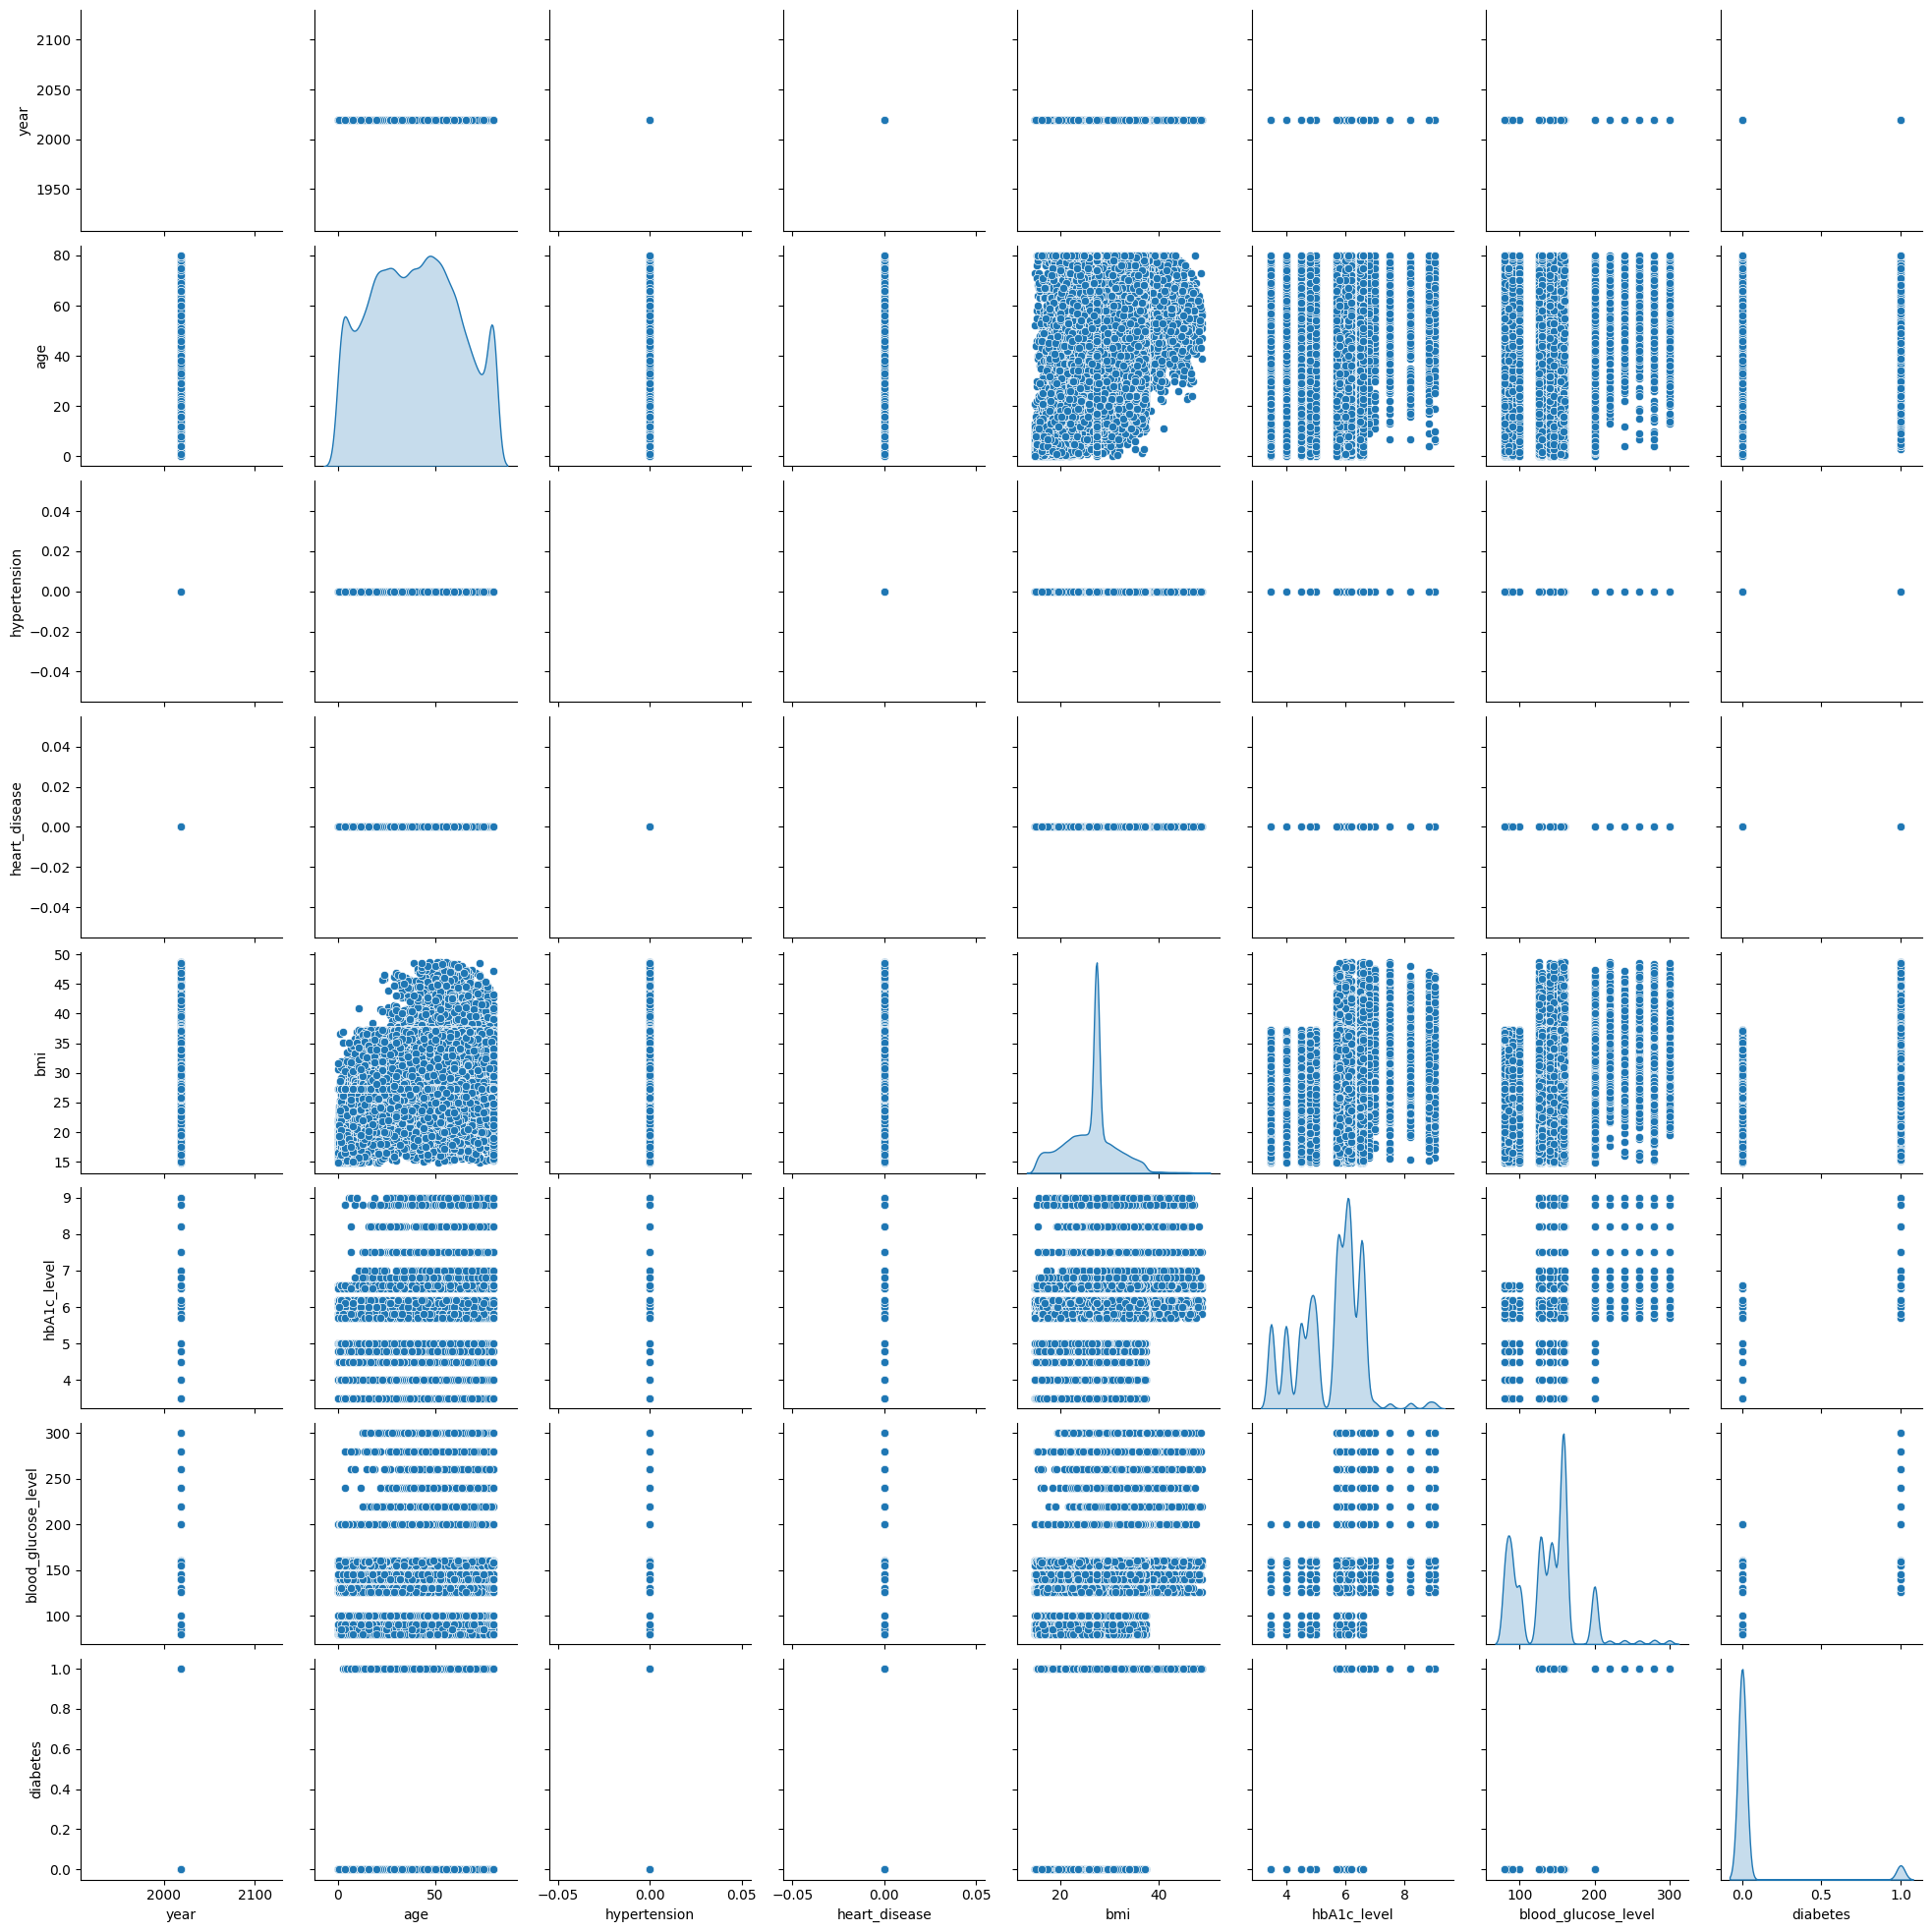

In [26]:
sns.pairplot(df_diabet, diag_kind='kde')

### 3.2.7 Correlation Matrix menggunakan *Heatmap*

Melakukan pengecekan korelasi antar fitur numerik dengan menggunakan visualisasi diagram *heatmap* *correlation matrix*.

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik')

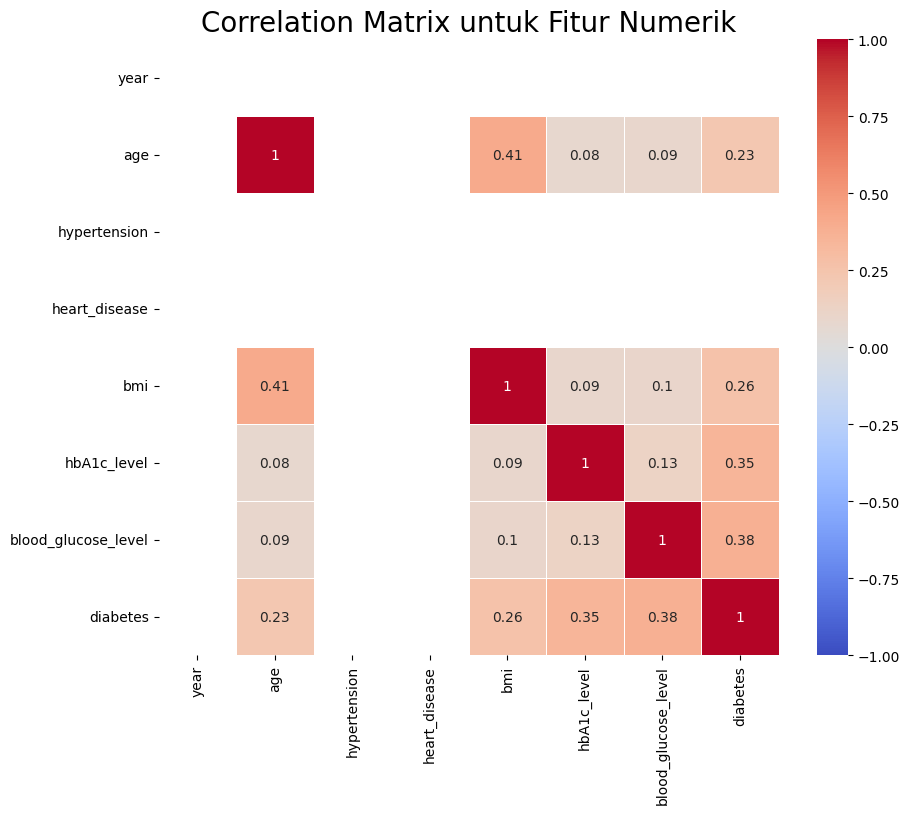

In [27]:
plt.figure(figsize = (10, 8))
numerical_features = ['year', 'age', 'hypertension', 'heart_disease', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'diabetes']
correlation_matrix = df_diabet[numerical_features].corr().round(2)

sns.heatmap(
    data       = correlation_matrix,
    vmin       = -1,
    vmax       = 1,
    cmap       = 'coolwarm',
    annot      = True,
    linewidths = 0.5
)

plt.title('Correlation Matrix untuk Fitur Numerik', size=20)

Dapat dilihat pada diagram *heatmap* di atas memiliki *range* atau rentang angka dari 1.0 hingga 0.08 dengan keterangan sebagai berikut,
*   Jika semakin mendekati 1, maka korelasi antar fitur numerik semakin kuat bernilai positif.
*   Jika semakin mendekati 0, maka korelasi antar fitur numerik semakin rendah.
*   Jika semakin mendekati -1, maka korelasi antar fitur numerik semakin kuat bernilai negatif.

Jika korelasi bernilai positif, berarti nilai kedua fitur numerik cenderung meningkat bersama-sama.

Jika korelasi bernilai negatif, berarti nilai salah satu fitur numerik cenderung meningkat ketika nilai fitur numerik yang lain menurun.


# **4. Data Preparation**

## 4.1 Split Data

 Mengubah fitur kategorikal menjadi numerik menggunakan Label Encoding agar semua data dalam dataset bertipe numerik

In [28]:
categorical_features = ['gender', 'location', 'smoking_history', 'race']

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each categorical feature
for feature in categorical_features:
  # Fit and transform the feature using LabelEncoder
  df_diabet[feature] = le.fit_transform(df_diabet[feature])

# Display the first few rows of the dataframe with numerical categorical features
df_diabet.head()

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
342,2019,0,69.0,0,0,0,0,29.24,6.6,159,1,2
344,2019,1,26.0,0,0,0,4,27.89,8.2,140,1,3
381,2019,0,80.0,0,0,0,3,31.59,8.8,145,1,3
410,2019,1,59.0,0,0,0,4,31.82,6.8,200,1,2
452,2019,0,40.0,0,0,0,4,33.46,6.1,260,1,4


Melakukan *define* atau mendefinisikan variabel `x` yang berisi fitur-fitur untuk memprediksi diabetes dengan mengecualikan fitur yang tidak diperlukan, serta variabel `y` yang merupakan fitur target atau nilai yang akan diprediksi.

In [29]:
x = df_diabet[['age', 'bmi', 'hbA1c_level', 'blood_glucose_level', 'gender', 'location', 'smoking_history', 'race']] # Include the numerical features
y = df_diabet['diabetes']

Melakukan pembagian *dataset* (*split data*) dengan menggunakan `train_test_split` menjadi data latih (*training*) dan data uji (*testing*). Lalu menampilkan total *dataset* secara keseluruhan, total data latih (*training*), dan total data uji (*testing*).

In [30]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.1, random_state=123)

print(f'Total seluruh sampel : {len(x)}')
print(f'Total data train     : {len(xTrain)}')
print(f'Total data test      : {len(xTest)}')

Total seluruh sampel : 66511
Total data train     : 59859
Total data test      : 6652


## 4.2 Standarisasi pada Fitur Numerik

Melakukan standarisasi nilai pada fitur numerik dengan menggunakan `StandardScaler` dari *library* `scikit-learn`. Proses standarisasi ini bertujuan untuk mencegah terjadinya penyimpangan nilai data yang cukup besar.

In [31]:
numericalFeatures = ['age', 'bmi', 'hbA1c_level', 'blood_glucose_level'] # Exclude 'diabetes' as it's the target variable

scaler = StandardScaler()
scaler.fit(xTrain[numericalFeatures])
xTrain[numericalFeatures] = scaler.transform(xTrain.loc[:, numericalFeatures])
xTrain[numericalFeatures].head()

,age,bmi,hbA1c_level,blood_glucose_level
57684,-1.159412,-1.056342,0.576090,0.462202
51469,-0.028597,0.082958,-0.475589,-0.941541
59092,-0.933249,-0.899889,0.671697,0.206976
72187,0.559428,1.129990,0.193661,0.462202
34182,0.876056,0.227376,0.480483,0.538770


In [32]:
xTrain[numericalFeatures].describe().round(4)

,age,bmi,hbA1c_level,blood_glucose_level
count,59859.0000,59859.0000,59859.0000,59859.0000
mean,-0.0000,0.0000,0.0000,-0.0000
std,1.0000,1.0000,1.0000,1.0000
min,-1.7891,-2.2839,-1.9097,-1.4520
25%,-0.7976,-0.6191,-0.6668,-0.9415
50%,-0.0286,0.2274,0.2893,0.0794
75%,0.7856,0.3517,0.6717,0.5643
max,1.8259,4.5158,3.3487,4.1630


`StandardScaler` akan melakukan proses standarisasi fitur dengan mengurangkan nilai rata-rata (`mean`) lalu membaginya dengan standar deviasi/simpangan baku (`std`) untuk menggeser distribusi nilai. Proses standarisasi akan menghasilakn distribusi dengan nilai rata-rata (`mean`) menjadi 0 dan nilai standar deviasi/simpangan baku (`std`) menjadi 1.

# **5. Model Development**

## 5.1 *Model Preparation*

Mempersiapkan *dataframe* untuk melakukan analisis model dengan parameter `index`, yaitu `train_mse` dan `test_mse`, serta parameter `columns` yang merupakan algoritma yang akan digunakan untuk melakukan prediksi, yaitu algoritma K-Nearest Neighbor (KNN), Random Forest, dan Adaptive Boosting (AdaBoost).

In [33]:
models = pd.DataFrame(
    index   = ['train_mse', 'test_mse'],
    columns = ['KNN', 'RandomForest', 'Boosting']
)

## 5.2 K-Nearest Neighbor (KNN) Algorithm

Algoritma K-Nearest Neighbor (KNN) akan menggunakan metode kemiripan dari data uji (*testing*) dan data latih (*training*) dengan mencari kesamaan pada fitur-fiturnya. K-Nearest Neighbor bekerja dengan membandingkan jarak satu sampel ke sampel pelatihan lain berdasarkan sejumlah k-tetangga terdekat (k = nilai atau angka positif).

In [34]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(xTrain, yTrain)

models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(xTrain), y_true=yTrain)

## 5.3 Random Forest Algorithm

Algoritma Random Forest merupakan algoritma *supervised learning* yang termasuk pada golongan *ensemble* (*group*) *learning*. Oleh karena itu, algoritma Random Forest terdiri dari beberapa model yang akan bekerja bersama-sama secara independen, dan prediksi dari setiap model ensemble akan digabungkan untuk membuat hasil prediksi akhir.

In [35]:
rf = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
rf.fit(xTrain, yTrain)

models.loc['train_mse', 'RandomForest'] = mean_squared_error(y_pred=rf.predict(xTrain), y_true=yTrain)

## 5.4 Adaptive Boosting (AdaBoost) Algorithm

Algoritma Adaptive Boosting (AdaBoost) merupakan algoritma yang melatih model secara berurutan dan dalam proses iteratif (berulang). Data latih (training) akan memiliki *weight* atau bobot yang sama, kemudian model akan melakukan pemeriksaan atau observasi. Bobot yang lebih tinggi kemudian akan dimasukkan ke dalam model yang salah sehingga akan lanjut ke tahap selanjutnya. Proses iteratif tersebut akan berlanjut hingga model mencapai akurasi yang diinginkan.

In [36]:
boosting = AdaBoostClassifier(learning_rate=0.05, random_state=55)
boosting.fit(xTrain, yTrain)

models.loc['train_mse', 'Boosting'] = mean_squared_error(y_pred=boosting.predict(xTrain), y_true = yTrain)

# **6. *Model Evaluation***

Melakukan standarisasi atau *scaling* pada fitur numerik data uji (*testing*) sehingga rata-rata (*mean*) bernilai 0, dan varians bernilai 1.

In [37]:
xTest.loc[:, numericalFeatures] = scaler.transform(xTest[numericalFeatures])

<ipython-input-37-ed78f0989559>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-1.45199246  0.07936312 -1.19676653 ...  0.56429238  0.20697608
 -1.3243795 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  xTest.loc[:, numericalFeatures] = scaler.transform(xTest[numericalFeatures])


Melakukan evaluasi dari ketiga model, yaitu algoritma K-Nearest Neighbor, Random Forest, dan Adaptive Boosting (AdaBoost) untuk masing-masing data latih (*training*) dan data uji (*testing*) dengan melihat tingkat *error*-nya menggunakan Mean Squared Error (MSE).

In [38]:
mse = pd.DataFrame(columns=['train', 'test'], index=['KNN', 'RF', 'Boosting'])

modelDict = {
    'KNN'     : knn,
    'RF'      : rf,
    'Boosting': boosting
}

for name, model in modelDict.items():
    mse.loc[name, 'train'] = mean_squared_error(y_true=yTrain, y_pred=model.predict(xTrain))/1e3
    mse.loc[name, 'test']  = mean_squared_error(y_true=yTest,  y_pred=model.predict(xTest))/1e3

mse

,train,test
KNN,0.000035,0.000034
RF,0.000016,0.000016
Boosting,0.000053,0.000048


Melakukan visualisasi data *error* setiap model dengan algoritma K-Nearest Neighbor, Random Forest, dan Adaptive Boosting (AdaBoost) untuk masing-masing data latih (*training*) dan data uji (*testing*) dengan menggunakan plot *bar chart*.

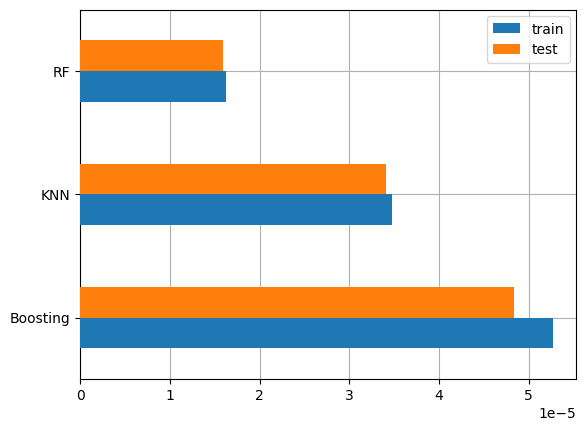

In [39]:
fig, ax = plt.subplots()
mse.sort_values(by='test', ascending=False).plot(kind='barh', ax=ax, zorder=3)
ax.grid(zorder=0)

Dari visualisasi diagram di atas dapat disimpulkan bahwa,
1. Model dengan algoritma Random Forest memberikan nilai error yang paling kecil, yaitu sebesar 0.000016 pada training error, dan 0.000016 pada testing error. Ini menunjukkan bahwa model mampu melakukan prediksi dengan baik dan memiliki generalisasi yang kuat.

2. Model dengan algoritma K-Nearest Neighbor memiliki tingkat error yang sedang di antara dua algoritma lainnya, dengan nilai training error sebesar 0.000035, dan testing error sebesar 0.000034. Meskipun selisih error kecil, performa Boosting masih berada di bawah Random Forest dalam hal akurasi prediksi keseluruhan.

3. Model dengan algoritma Adaptive Boosting mengalami error yang lebih besar dibandingkan Random Forest dan K-Nearest Neighbor, dengan nilai training error sebesar 0.000053, dan testing error sebesar 0.000048.

Melakukan pengujian prediksi dengan menggunakan beberapa nilai diabetes `df_diabet` dari data uji (*testing*)

In [40]:
prediksi  = xTest.iloc[:1].copy()
pred_dict = {'y_true': yTest[:1]}

for name, model in modelDict.items():
    pred_dict['prediksi_' + name] = model.predict(prediksi).round(1)

pd.DataFrame(pred_dict)

,y_true,prediksi_KNN,prediksi_RF,prediksi_Boosting
86159,0,0,0,0


Dapat dilihat bahwa prediksi pada model dengan algoritma **Random Forest** memberikan hasil yang **paling mendekati nilai `y_true`** jika dibandingkan dengan model algoritma lainnya.

Nilai `y_true` adalah **0**, yang berarti pasien tersebut **tidak menderita diabetes**, dan ketiga model (`KNN`, `Random Forest`, dan `Boosting`) sama-sama menghasilkan prediksi sebesar **0.0** yang menunjukkan bahwa model memperkirakan pasien tidak mengidap diabetes.

Meskipun dalam kasus ini seluruh model memberikan hasil prediksi yang identik dengan nilai sebenarnya, model **Random Forest** tetap dianggap sebagai model dengan **tingkat *error* paling rendah secara keseluruhan**, berdasarkan evaluasi sebelumnya pada metrik MSE (*Mean Squared Error*).

Kesimpulannya adalah model yang digunakan untuk melakukan prediksi **diabetes (binary classification)** memberikan hasil terbaik ketika menggunakan algoritma **Random Forest**, karena mampu menghasilkan prediksi yang akurat dan konsisten dengan nilai `y_true`.